In [45]:
from datetime import datetime, timedelta
import geopandas as gp
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sb
from shapely.geometry import Polygon
import os

plt.rcParams['figure.figsize'] = (10, 20)
%matplotlib inline

In [46]:
base_file = "../data/AvalDet_20190424_155109_ref_20190313_trno_087_VV/AvalDet_20190424_155109_ref_20190313_trno_087_VV.shp"
gdf = gp.read_file(base_file)
gdf.drop(index=1, inplace=True)
gdf.head()

,area,aspect,det_count,east,length,north,raster_val,refdate,sat_geom,source,...,vh1_max,vv0_mean,vv0_median,vv0_min,vv0_max,vh0_mean,vh0_median,vh0_min,vh0_max,geometry
0,10394.8943,None,1,20.944515,793.557988,69.714452,11.0,2019-03-13 15:50:19.000220,87,AvalDet_20190424_155109_ref_20190313_trno_087_...,...,-15.749162,-10.2966,-10.15564,-13.197838,-7.651885,-19.937243,-20.155186,-22.938601,-16.017008,"POLYGON ((20.94465714165575 69.71382402696912,..."


In [47]:
gdf.columns

Index(['area', 'aspect', 'det_count', 'east', 'length', 'north', 'raster_val',
       'refdate', 'sat_geom', 'source', 't_0', 't_1', 'time', 'track_id',
       'uuid', 'width', 'dem_mean', 'dem_median', 'dem_min', 'dem_max',
       'slp_mean', 'slp_median', 'slp_min', 'slp_max', 'asp_mean',
       'asp_median', 'asp_min', 'asp_max', 'vv1_mean', 'vv1_median', 'vv1_min',
       'vv1_max', 'vh1_mean', 'vh1_median', 'vh1_min', 'vh1_max', 'vv0_mean',
       'vv0_median', 'vv0_min', 'vv0_max', 'vh0_mean', 'vh0_median', 'vh0_min',
       'vh0_max', 'geometry'],
      dtype='object')

The following columns are used in the import routine
- time -> skredTidspunkt (should probably be t_1)
- time -> registrertDato (should probably be t_1)
- geometry -> SHAPE

- dem_min -> hoydeStoppSkred_moh
- asp_median -> eksposisjonUtlopsomr 
- slp_mean -> snittHelningUtlopsomr_gr 
- slp_max -> maksHelningUtlopsomr_gr 
- slp_min -> minHelningUtlopsomr_gr
- area -> arealUtlopsomr_m2 

Important: skredID needs to be the same in all tables.

In [48]:
import_list = ['time', 'area', 'dem_min', 'asp_median', 'slp_mean', 'slp_max', 'slp_min', 'geometry']

In [49]:
# Add a name to the polygon
gdf['_name'] = "Original"

# convert t_0 (the time the reference image was taken) into a datetime object and give it a descriptive name
gdf['_reference_date'] = pd.to_datetime(gdf['t_0']) # this actually overwrites the existing column "refdate", but since it is a duplicate of t_0 we don't care. 

# convert t_1 (the time the activity image was taken) into a datetime object and give it a descriptive name
gdf['_detection_date'] = pd.to_datetime(gdf['t_1'])


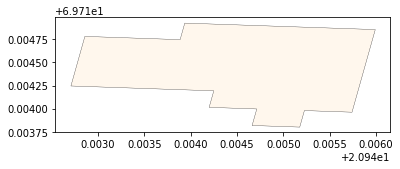

In [50]:
aval_map = gdf.plot(column="area", linewidth=0.3, edgecolor='black', cmap="OrRd", alpha=0.9)


In [51]:
plg = gdf['geometry'][0]
print(type(plg), plg)


<class 'shapely.geometry.polygon.Polygon'> POLYGON ((20.94465714165575 69.71382402696912, 20.94470735316531 69.71400241245273, 20.94419325473413 69.71401983461618, 20.9442434628668 69.7141982202462, 20.94372935925285 69.71421564107656, 20.94270114931648 69.71425047823899, 20.94285174061144 69.71478563650619, 20.94387997622828 69.71475079834599, 20.94393018369257 69.71492918406263, 20.94547254318632 69.71487691507734, 20.94598666121134 69.71485948908331, 20.94573554731867 69.71396756362762, 20.94522145069351 69.71398498878987, 20.94517123490418 69.71380660347262, 20.94465714165575 69.71382402696912))


In [52]:
scns = []

scn_dict = {
    "scn_0": {
        "le": 0.005,
        "re": 0.002,
        "bn": 0.005,
        "tn": 0.002,
        "dem_min": 800,
        "asp_median": 180,
        "slp_mean": 9.0,
        "slp_max": 12.0,
        "slp_min": 4.0,
        "days": 1,
        "seconds": 15,
        "_dis_id": 1
    },
    "scn_1": {
        "le": 0.006,
        "re": 0.002,
        "bn": 0.004,
        "tn": 0.002,
        "dem_min": 850,
        "asp_median": 190,
        "slp_mean": 8.0,
        "slp_max": 11.0,
        "slp_min": 3.0,
        "days": 3,
        "seconds": 65,
        "_dis_id": 1
    },
    "scn_2": {
        "le": 0.0055,
        "re": 0.002,
        "bn": 0.0055,
        "tn": 0.002,
        "dem_min": 850,
        "asp_median": 210,
        "slp_mean": 7.0,
        "slp_max": 10.0,
        "slp_min": 2.0,
        "days": 8,
        "seconds": 22,
        "_dis_id": 1
    },
    "scn_3": {
        "le": 0.007,
        "re": 0.003,
        "bn": 0.008,
        "tn": 0.003,
        "dem_min": 650,
        "asp_median": 110,
        "slp_mean": 9.5,
        "slp_max": 15.0,
        "slp_min": 5.2,
        "days": 1,
        "seconds": 15,
        "_dis_id": 1
    },
    "scn_4": {
        "le": 0.006,
        "re": 0.002,
        "bn": 0.006,
        "tn": 0.005,
        "dem_min": 770,
        "asp_median": 140,
        "slp_mean": 8.5,
        "slp_max": 14.3,
        "slp_min": 4.2,
        "days": 4,
        "seconds": 78,
        "_dis_id": 1
    }
}

In [53]:
def create_scenario(sd):
    # Input is an element from scn_dict
    
    # Define the base coordinates for the test polygons
    e_base = 20.94
    n_base= 69.71
    dt_fmt = '%Y-%m-%dT%H:%M:%S.%f'
    dt_fmt_act = '%Y%m%d_%H%M%S'
    dt_fmt_ref = '%Y%m%d'
    dt_base = datetime.strptime('2019-08-21T15:51:09.025897', dt_fmt)
    filename_base ="AvalDet_{0}_ref_{1}_trno_087_ZZ"
    
    le = e_base + sd["le"] # left_easting
    re = le + sd["re"] # right_easting
    bn = n_base + sd["bn"] # bottom_northing
    tn = bn + sd["tn"] # top_northing
    p = Polygon([(le, bn), (re, bn), (re, tn), (le, tn)])
    act_date = dt_base + timedelta(days=sd["days"], seconds=sd["seconds"])
    ref_date = act_date + timedelta(days=-6, seconds=-60)
    
    # Create a copy of the original polygon and alter its properties
    scn = gdf.copy(deep=True)
    scn['geometry'] = p
    print(scn.crs)
    scn.to_crs({'init': 'epsg:32633'}, inplace=True) 
    print(scn.crs)
    scn['area'] = scn['geometry'].area
    scn['length'] = scn['geometry'].length
    scn.to_crs(gdf.crs, inplace=True)
    
    scn['_name'] = filename_base.format(act_date.strftime(dt_fmt_act), ref_date.strftime(dt_fmt_ref))
    print(scn['_name'][0])
    scn['east'] = scn['geometry'].centroid.x
    scn['north'] = scn['geometry'].centroid.y
    scn['dem_min'] = sd['dem_min']
    scn['asp_median'] = sd['asp_median']
    scn['slp_mean'] = sd['slp_mean']
    scn['slp_max'] = sd['slp_max']
    scn['slp_min'] = sd['slp_min']
    scn['time'] = act_date.strftime(dt_fmt)
    scn['t_1'] = act_date.strftime(dt_fmt)
    scn['refdate'] = ref_date.strftime(dt_fmt)
    scn['t_0'] = ref_date.strftime(dt_fmt)
    scn['_dis_id'] = 1 # used only to merge (dissolve) polygons for verification needs to be same for all scns
    
    new_dir = '../data/{0}'.format(scn['_name'][0])
    if not os.path.exists(new_dir):
        os.mkdir(new_dir)
    scn.drop(['_detection_date', '_reference_date', '_dis_id'], axis=1).to_file(filename='../data/{0}/{0}.shp'.format(scn['_name'][0], scn['_name'][0]))

    return scn
    

In [54]:
for sd in scn_dict.keys():
    scns.append(create_scenario(scn_dict[sd]))


{'init': 'epsg:4326'}
{'init': 'epsg:32633'}
AvalDet_20190822_155124_ref_20190816_trno_087_ZZ
{'init': 'epsg:4326'}
{'init': 'epsg:32633'}
AvalDet_20190824_155214_ref_20190818_trno_087_ZZ
{'init': 'epsg:4326'}
{'init': 'epsg:32633'}
AvalDet_20190829_155131_ref_20190823_trno_087_ZZ
{'init': 'epsg:4326'}
{'init': 'epsg:32633'}
AvalDet_20190822_155124_ref_20190816_trno_087_ZZ
{'init': 'epsg:4326'}
{'init': 'epsg:32633'}
AvalDet_20190825_155227_ref_20190819_trno_087_ZZ


C:\Anaconda3\envs\APS\lib\site-packages\geopandas\io\file.py:108: FionaDeprecationWarning: Use fiona.Env() instead.
  with fiona.drivers():
C:\Anaconda3\envs\APS\lib\site-packages\geopandas\io\file.py:108: FionaDeprecationWarning: Use fiona.Env() instead.
  with fiona.drivers():
C:\Anaconda3\envs\APS\lib\site-packages\geopandas\io\file.py:108: FionaDeprecationWarning: Use fiona.Env() instead.
  with fiona.drivers():
C:\Anaconda3\envs\APS\lib\site-packages\geopandas\io\file.py:108: FionaDeprecationWarning: Use fiona.Env() instead.
  with fiona.drivers():
C:\Anaconda3\envs\APS\lib\site-packages\geopandas\io\file.py:108: FionaDeprecationWarning: Use fiona.Env() instead.
  with fiona.drivers():


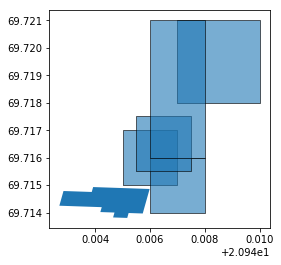

In [55]:
ax = gdf.plot()
for scn in scns:
    scn.plot(ax=ax, edgecolor='black', alpha=0.6)


In [56]:
scn_0a = pd.concat([scns[0], scns[3]])
new_dir = '../data/scn_0a'
if not os.path.exists(new_dir):
    os.mkdir(new_dir)
scn_0a.drop(['_detection_date', '_reference_date', '_dis_id'], axis=1).to_file(filename='../data/scn_0a/scn_0a.shp')


C:\Anaconda3\envs\APS\lib\site-packages\geopandas\io\file.py:108: FionaDeprecationWarning: Use fiona.Env() instead.
  with fiona.drivers():


In [57]:
test_scns = pd.concat(scns)
new_dir = '../data/scns'
if not os.path.exists(new_dir):
    os.mkdir(new_dir)
test_scns.drop(['_detection_date', '_reference_date', '_dis_id'], axis=1).to_file(filename='../data/scns/test_scns.shp')

dissolved_scns = test_scns.dissolve(by='_dis_id')

C:\Anaconda3\envs\APS\lib\site-packages\geopandas\io\file.py:108: FionaDeprecationWarning: Use fiona.Env() instead.
  with fiona.drivers():


In [58]:
test_scns.to_csv('../data/scns/scns.csv')
test_scns.filter(import_list).head()




,time,area,dem_min,asp_median,slp_mean,slp_max,slp_min,geometry
0,2019-08-22T15:51:24.025897,17280.273674,800,180,9.0,12.0,4.0,"POLYGON ((20.945 69.71499999999999, 20.947 69...."
0,2019-08-24T15:52:14.025897,17281.096651,850,190,8.0,11.0,3.0,"POLYGON ((20.946 69.714, 20.948 69.714, 20.948..."
0,2019-08-29T15:51:31.025897,17279.869669,850,210,7.0,10.0,2.0,"POLYGON ((20.9455 69.71549999999999, 20.9475 6..."
0,2019-08-22T15:51:24.025897,38874.235753,650,110,9.5,15.0,5.2,"POLYGON ((20.947 69.71799999999999, 20.95 69.7..."
0,2019-08-25T15:52:27.025897,43195.605978,770,140,8.5,14.3,4.2,"POLYGON ((20.94600000000001 69.71599999999999,..."
